### Loading Libraries and Datasets

#### Libraries:

In [2]:
import pandas as pd # Reads, writes, shapes, manipulates data
import numpy as np # Basic stats and numerical operations
import matplotlib.pyplot as plt # Creating basic graphs

#### Datasets:

In [2]:
#Cost of Living dataset
cost = pd.read_csv("Cost_of_Living_and_Income_Extended.csv", delimiter = ",")

#World Happiness Ranking dataset
happy = pd.read_excel("Data+for+Figure+2.1+(2011–2024).xlsx")

### Exploring the Datasets

In [3]:
print(cost.info()) #Prints the columns, Non-Null count and the datatype
print(happy.info()) #Prints the columns, Non-Null count and the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         500 non-null    object 
 1   Year                            500 non-null    int64  
 2   Average_Monthly_Income          500 non-null    float64
 3   Cost_of_Living                  500 non-null    float64
 4   Housing_Cost_Percentage         500 non-null    float64
 5   Tax_Rate                        500 non-null    float64
 6   Savings_Percentage              500 non-null    float64
 7   Healthcare_Cost_Percentage      500 non-null    float64
 8   Education_Cost_Percentage       500 non-null    float64
 9   Transportation_Cost_Percentage  500 non-null    float64
 10  Region                          500 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.1+ KB
None
<class 'pandas.core.frame.DataFram

The cost of living dataset has 500 entries and no NaN values. The World happiness ranking has 1969 entries and NaN values.

In [4]:
print(cost.head()) #Prints the first 5 data entires
print(happy.head()) #Prints the first 5 data entires

        Country  Year  Average_Monthly_Income  Cost_of_Living  \
0     Australia  2013                 3483.92         1106.07   
1         India  2019                 7771.03         5422.78   
2        Russia  2004                 6991.30         3972.36   
3  South Africa  2011                 6628.04         6755.75   
4        Brazil  2015                 2434.27         2656.36   

   Housing_Cost_Percentage  Tax_Rate  Savings_Percentage  \
0                    32.09     27.50                1.74   
1                    25.21     29.30                3.35   
2                    40.85     22.94               15.48   
3                    30.38     15.69                8.03   
4                    49.27     12.44               25.06   

   Healthcare_Cost_Percentage  Education_Cost_Percentage  \
0                       18.23                       6.94   
1                       17.21                      12.42   
2                       15.28                       7.10   
3       

### Cleaning the Datasets

#### Column Names:

In [5]:
#The columns need to be lowercase and underscores in place of spaces
print(cost.columns)
print(happy.columns)

Index(['Country', 'Year', 'Average_Monthly_Income', 'Cost_of_Living',
       'Housing_Cost_Percentage', 'Tax_Rate', 'Savings_Percentage',
       'Healthcare_Cost_Percentage', 'Education_Cost_Percentage',
       'Transportation_Cost_Percentage', 'Region'],
      dtype='object')
Index(['Year', 'Rank', 'Country name', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


In [6]:
#Cost Dataset
cost.columns = cost.columns.str.lower()
print(cost.columns)

Index(['country', 'year', 'average_monthly_income', 'cost_of_living',
       'housing_cost_percentage', 'tax_rate', 'savings_percentage',
       'healthcare_cost_percentage', 'education_cost_percentage',
       'transportation_cost_percentage', 'region'],
      dtype='object')


In [7]:
#Happiness Dataset
happy.rename(columns = {"Year": "year", "Rank": "happiness_rank", "Country name": "country", "Ladder score": "happiness_score", 
                        "Explained by: Log GDP per capita": "explained_by_log_gdp_per_capita", 
                        "Explained by: Social support": "explained_by_social_support", 
                        "Explained by: Healthy life expectancy": "explained_by_healthy_life_expectancy",
                        "Explained by: Freedom to make life choices": "explained_by_freedom_to_make_life_choices", 
                        "Explained by: Generosity": "explained_by_generosity", 
                        "Explained by: Perceptions of corruption": "explained_by_perceptions of corruptions", 
                        "Dystopia + residual": "dystopia_and_residual"}, inplace = True)
print(happy.columns)

Index(['year', 'happiness_rank', 'country', 'happiness_score', 'upperwhisker',
       'lowerwhisker', 'explained_by_log_gdp_per_capita',
       'explained_by_social_support', 'explained_by_healthy_life_expectancy',
       'explained_by_freedom_to_make_life_choices', 'explained_by_generosity',
       'explained_by_perceptions of corruptions', 'dystopia_and_residual'],
      dtype='object')


#### NaNs:

**World Happiness Data:**

In [8]:
print(happy.isna().sum()) #Sums and prints the NaN for each column

year                                            0
happiness_rank                                  0
country                                         0
happiness_score                                 0
upperwhisker                                 1094
lowerwhisker                                 1094
explained_by_log_gdp_per_capita              1097
explained_by_social_support                  1097
explained_by_healthy_life_expectancy         1099
explained_by_freedom_to_make_life_choices    1098
explained_by_generosity                      1097
explained_by_perceptions of corruptions      1098
dystopia_and_residual                        1101
dtype: int64


I am going to leave the NaNs for now. How we deciceded to combine this data with the cost of living data will determine what NaNs should be removed. The main information, year, country, happiness rank and happiness_score have no NaNs.

#### Unique Entries and Typos: 

**Cost of Living Data:**

In [9]:
#Country Column
sorted(cost["country"].unique()) #Sorts the unique values in alphabetical order

['Australia',
 'Brazil',
 'Canada',
 'China',
 'France',
 'Germany',
 'India',
 'Japan',
 'Mexico',
 'Russia',
 'South Africa',
 'United States']

In [10]:
#Year Column
sorted(cost["year"].unique()) #Sorts the unique values in ascending order

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [11]:
#Region Column
sorted(cost["region"].unique()) #Sorts the unique values in alphabetical order

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

**World Happiness Data:**

In [12]:
#Year column
sorted(happy["year"].unique()) #Sorts the unique values in ascending order

[2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

In [13]:
#Rank Column
sorted(happy["happiness_rank"].unique()) #Sorts the unique values in ascending order

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158]

In [14]:
#Country Column
sorted(happy["country"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Côte d’Ivoire',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong SAR of China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwai

#### Outliers and Errors:

**Cost of Living Data:**

In [15]:
cost_num = cost.select_dtypes(include = "float64") #Pulls the numeric columns into their own dataframe
cost_num.describe()

,average_monthly_income,cost_of_living,housing_cost_percentage,tax_rate,savings_percentage,healthcare_cost_percentage,education_cost_percentage,transportation_cost_percentage
count,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,4291.248240,3716.23212,34.973700,22.400900,14.92708,12.381820,8.408440,12.475940
std,2179.217333,1922.16053,8.657032,10.025412,8.81321,4.269823,3.775455,4.219147
min,534.740000,432.60000,20.100000,5.000000,0.00000,5.010000,2.000000,5.060000
25%,2322.360000,1967.79000,27.235000,14.742500,7.52500,8.487500,5.285000,8.752500
50%,4391.585000,3803.20500,35.170000,22.275000,14.95000,12.365000,8.245000,12.665000
75%,6233.757500,5265.96750,42.567500,30.905000,22.42750,16.222500,11.595000,15.952500
max,7984.510000,6996.13000,49.950000,39.920000,29.84000,19.990000,14.940000,19.970000


There are no obvious outliers or errors but I will make boxplots to confirm.

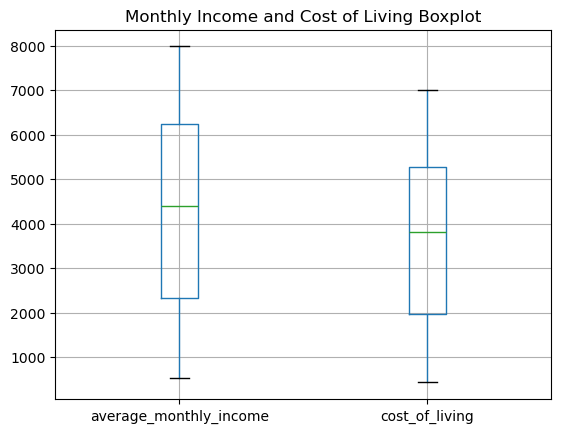

In [16]:
cost_num[["average_monthly_income", "cost_of_living"]].boxplot()
plt.title("Monthly Income and Cost of Living Boxplot")
plt.show()

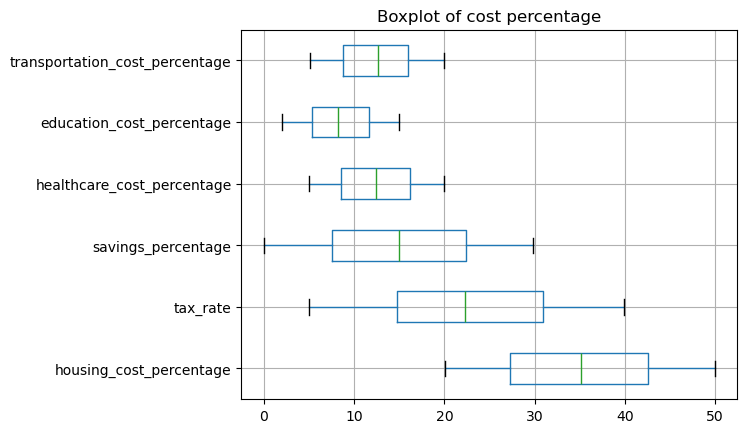

In [17]:
cost_num[["housing_cost_percentage", "tax_rate", "savings_percentage", "healthcare_cost_percentage",	
          "education_cost_percentage", "transportation_cost_percentage"]].boxplot(vert=False)
plt.title("Boxplot of cost percentage")
plt.show()

**World Happiness Data:**

In [18]:
happy_num = happy.select_dtypes(include = "float64") #Pulls the numeric columns into their own dataframe
happy_num.describe()

,happiness_score,upperwhisker,lowerwhisker,explained_by_log_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions of corruptions,dystopia_and_residual
count,1969.000000,875.000000,875.000000,872.000000,872.000000,870.000000,871.000000,872.000000,871.000000,868.000000
mean,5.451903,5.648684,5.418734,1.220279,1.078536,0.542915,0.563730,0.154261,0.144356,1.832778
std,1.121864,1.103939,1.139063,0.463448,0.355057,0.222944,0.180204,0.086731,0.120290,0.628796
min,1.364000,1.427000,1.301000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.596000,4.885000,4.638164,0.901355,0.850750,0.383000,0.450527,0.092000,0.062000,1.455000
50%,5.456200,5.775000,5.529000,1.263500,1.106699,0.555000,0.571000,0.140500,0.113000,1.854000
75%,6.295000,6.458500,6.254000,1.567000,1.361000,0.704750,0.676000,0.205000,0.180000,2.237078
max,7.856000,7.904000,7.780000,2.209000,1.840000,1.137814,1.018000,0.569814,0.587000,3.482000


There does not appear to be any obvious outliers but I will make box plots to double check.

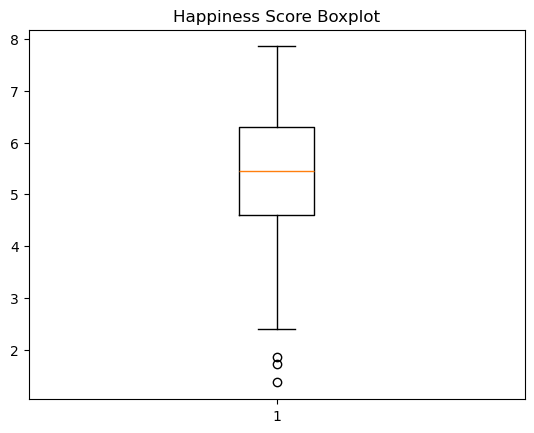

In [19]:
plt.boxplot(happy_num["happiness_score"])
plt.title("Happiness Score Boxplot")
plt.show()

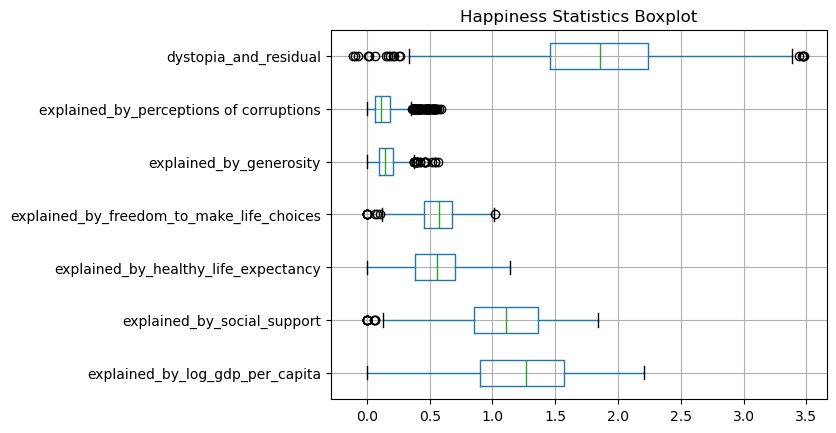

In [20]:
happy_num[["explained_by_log_gdp_per_capita", "explained_by_social_support", "explained_by_healthy_life_expectancy",
           "explained_by_freedom_to_make_life_choices",	"explained_by_generosity", "explained_by_perceptions of corruptions", 
           "dystopia_and_residual"]].boxplot(vert = False)
plt.title("Happiness Statistics Boxplot")
plt.show()

There are outliers in all columns except explained by log GDP per capita and explained by healthy life expectancy. None of these outliers are too extreme with a possible exception with the dystopia and residual column. Dystopia is what the World Happiness Report uses as their worst country baseline. It stands in for a fictional country that scores the worst it can in all the other six categories. Residuals are included to explain how the happiness score either under-represents or over-represents a country's happiness. Because not all of these columns will be used, including the dystopia and residuals column, I will leave the outliers as they are.

#### Saving the Cleaned Data

In [22]:
cost.to_csv("Cost_of_Living_and_Income_clean.csv", index=False)
happy.to_csv("World_Happiness_Rank_clean.csv", index=False)

#### Combining the Datasets

First I am going to pull the columns from the World Happiness Data set that we would want to include in our database.

In [60]:
happy_database = happy[["year", "happiness_rank", "country", "happiness_score", "upperwhisker", "lowerwhisker", "explained_by_log_gdp_per_capita"]]
    #The desired columns from the World Happiness Data

In [61]:
cost_happy = pd.merge(cost, happy_database, on = ["year", "country"], how = "left") #Merges the data sets to the left based on year and country
print(cost_happy.head())

        country  year  average_monthly_income  cost_of_living  \
0     Australia  2013                 3483.92         1106.07   
1         India  2019                 7771.03         5422.78   
2        Russia  2004                 6991.30         3972.36   
3  South Africa  2011                 6628.04         6755.75   
4        Brazil  2015                 2434.27         2656.36   

   housing_cost_percentage  tax_rate  savings_percentage  \
0                    32.09     27.50                1.74   
1                    25.21     29.30                3.35   
2                    40.85     22.94               15.48   
3                    30.38     15.69                8.03   
4                    49.27     12.44               25.06   

   healthcare_cost_percentage  education_cost_percentage  \
0                       18.23                       6.94   
1                       17.21                      12.42   
2                       15.28                       7.10   
3       

In this merge, I kept all of the rows from the cost of living dataset and only merged the rows from the World Happiness ranking dataset that had matching records for year and country. I did this because the cost of living dataset only included 12 countries and the World Happiness ranking includes almost every country. <br>
I am going to reorder the columns to make it easier to interpret. 

In [62]:
cost_happy.columns #Takes a look a the column names

Index(['country', 'year', 'average_monthly_income', 'cost_of_living',
       'housing_cost_percentage', 'tax_rate', 'savings_percentage',
       'healthcare_cost_percentage', 'education_cost_percentage',
       'transportation_cost_percentage', 'region', 'happiness_rank',
       'happiness_score', 'upperwhisker', 'lowerwhisker',
       'explained_by_log_gdp_per_capita'],
      dtype='object')

In [63]:
cost_happy = cost_happy [["country", "region", "year", "happiness_rank", "average_monthly_income", "cost_of_living", "tax_rate", "housing_cost_percentage", 
                          "healthcare_cost_percentage", "education_cost_percentage", "transportation_cost_percentage", "savings_percentage", 
                          "happiness_score", "upperwhisker", "lowerwhisker", "explained_by_log_gdp_per_capita"]] #Re-orders the columns
print(cost_happy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          500 non-null    object 
 1   region                           500 non-null    object 
 2   year                             500 non-null    int64  
 3   happiness_rank                   244 non-null    float64
 4   average_monthly_income           500 non-null    float64
 5   cost_of_living                   500 non-null    float64
 6   tax_rate                         500 non-null    float64
 7   housing_cost_percentage          500 non-null    float64
 8   healthcare_cost_percentage       500 non-null    float64
 9   education_cost_percentage        500 non-null    float64
 10  transportation_cost_percentage   500 non-null    float64
 11  savings_percentage               500 non-null    float64
 12  happiness_score       

The limited information from the upperwhisker, lowerwhisker, and explained by log GDP per capita columns makes me realize that it is not a good addition to the data. 

In [64]:
cost_happy = cost_happy.drop(columns = ["upperwhisker", "lowerwhisker", "explained_by_log_gdp_per_capita"]) #Drops the columns
cost_happy.head()

,country,region,year,happiness_rank,average_monthly_income,cost_of_living,tax_rate,housing_cost_percentage,healthcare_cost_percentage,education_cost_percentage,transportation_cost_percentage,savings_percentage,happiness_score
0,Australia,Oceania,2013,NaN,3483.92,1106.07,27.50,32.09,18.23,6.94,17.19,1.74,NaN
1,India,Asia,2019,144.0,7771.03,5422.78,29.30,25.21,17.21,12.42,9.90,3.35,3.5733
2,Russia,Europe,2004,NaN,6991.30,3972.36,22.94,40.85,15.28,7.10,9.59,15.48,NaN
3,South Africa,Africa,2011,90.0,6628.04,6755.75,15.69,30.38,6.66,11.76,11.04,8.03,5.1010
4,Brazil,South America,2015,17.0,2434.27,2656.36,12.44,49.27,9.34,3.63,15.09,25.06,6.9520


In [65]:
cost_happy.info() #Re-examining the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         500 non-null    object 
 1   region                          500 non-null    object 
 2   year                            500 non-null    int64  
 3   happiness_rank                  244 non-null    float64
 4   average_monthly_income          500 non-null    float64
 5   cost_of_living                  500 non-null    float64
 6   tax_rate                        500 non-null    float64
 7   housing_cost_percentage         500 non-null    float64
 8   healthcare_cost_percentage      500 non-null    float64
 9   education_cost_percentage       500 non-null    float64
 10  transportation_cost_percentage  500 non-null    float64
 11  savings_percentage              500 non-null    float64
 12  happiness_score                 244 

In [66]:
after_2010 = cost_happy[cost_happy["year"] > 2010] #Pulls the data from the years 2011 onward
print(after_2010.info()) #Prints the columns, Non-Null, and data type

before_2011 = cost_happy[cost_happy["year"] <= 2010] #Pulls the data from the years 2010 to 2000
print(before_2011.info()) #Prints the columns, Non-Null, and data type

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 498
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         278 non-null    object 
 1   region                          278 non-null    object 
 2   year                            278 non-null    int64  
 3   happiness_rank                  244 non-null    float64
 4   average_monthly_income          278 non-null    float64
 5   cost_of_living                  278 non-null    float64
 6   tax_rate                        278 non-null    float64
 7   housing_cost_percentage         278 non-null    float64
 8   healthcare_cost_percentage      278 non-null    float64
 9   education_cost_percentage       278 non-null    float64
 10  transportation_cost_percentage  278 non-null    float64
 11  savings_percentage              278 non-null    float64
 12  happiness_score                 244 non-n

The world happiness data only contians data from 2011 to 2024 which would explain NaNs in previous years. I will drop the NaNs from the years 2011 to 2024.

In [72]:
print(after_2010.isna().sum()) #Prints the number of NaNs from 2011 to 2024
print(before_2011.isna().sum()) #Prints the number of NaNs from 2000 to 2010
    #34 rows should be removed and 222 NaN values should be left

nan_rows = after_2010[after_2010.isna().any(axis=1)].index #Pulls the row index with the NaN values from the after 2010 data frame

cost_happy = cost_happy.drop(nan_rows)
print(cost_happy.isna().sum())
print(cost_happy.info())

country                            0
region                             0
year                               0
happiness_rank                    34
average_monthly_income             0
cost_of_living                     0
tax_rate                           0
housing_cost_percentage            0
healthcare_cost_percentage         0
education_cost_percentage          0
transportation_cost_percentage     0
savings_percentage                 0
happiness_score                   34
dtype: int64
country                             0
region                              0
year                                0
happiness_rank                    222
average_monthly_income              0
cost_of_living                      0
tax_rate                            0
housing_cost_percentage             0
healthcare_cost_percentage          0
education_cost_percentage           0
transportation_cost_percentage      0
savings_percentage                  0
happiness_score                   222
dtype: int64

#### Saving the New Clean Dataset

In [5]:
cost_happy = pd.read_csv('Cost_of_Living_Happiness_Rank.csv')
cost_happy = cost_happy.replace(np.nan, None)

print(cost_happy.head())

        country         region  year happiness_rank  average_monthly_income  \
0         India           Asia  2019          144.0                 7771.03   
1        Russia         Europe  2004           None                 6991.30   
2  South Africa         Africa  2011           90.0                 6628.04   
3        Brazil  South America  2015           17.0                 2434.27   
4     Australia        Oceania  2015            9.0                 1781.66   

   cost_of_living  tax_rate  housing_cost_percentage  \
0         5422.78     29.30                    25.21   
1         3972.36     22.94                    40.85   
2         6755.75     15.69                    30.38   
3         2656.36     12.44                    49.27   
4         4575.30      6.16                    39.23   

   healthcare_cost_percentage  education_cost_percentage  \
0                       17.21                      12.42   
1                       15.28                       7.10   
2       

In [6]:
cost_happy.to_csv("Cost_of_Living_Happiness_Rank_2.csv", index=False)